任务：把normal和lognormal分布参数的关系搞清楚

LogNormal Input
- log(TV)
- Standard Variance (<-CV / Varaince)

LogNormal Output
- already anti-log transformed values
- ready-to-use parameters
- no need to exp it

In [1]:
import jax.numpy as jnp
from jax import random

import numpyro
import numpyro.distributions as dist

import matplotlib.pyplot as plt

/Users/peng/miniforge3/envs/numpyro/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Mean: 5.100470066070557 | STD: 1.371448278427124


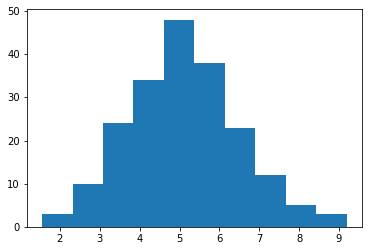

In [2]:
# generate a set of normally distributed numbers
x = random.normal(key=random.PRNGKey(123), shape=(200,)) * 1.5 + 5
plt.hist(x)
print(f"Mean: {x.mean()} | STD: {x.std()}")

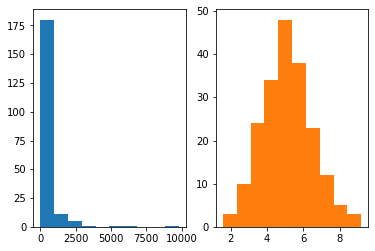

In [3]:
# y = exp(x) => y is lognormally distributed
y = jnp.exp(x)

plt.subplot(121)
plt.hist(y)

plt.subplot(122)
plt.hist(jnp.log(y), color="C1")
plt.show()

(array([ 3., 10., 24., 34., 48., 38., 23., 12.,  5.,  3.]),
 array([1.555656 , 2.3188868, 3.0821176, 3.8453486, 4.608579 , 5.37181  ,
        6.135041 , 6.898272 , 7.661503 , 8.424733 , 9.187964 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

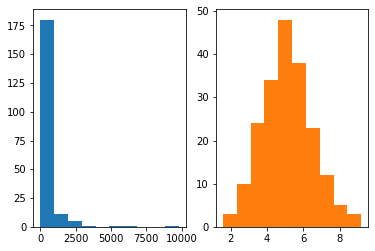

In [4]:
# if generate a set of log-normally distributed number
y_2 = dist.LogNormal(loc=5, scale=1.5).sample(key=random.PRNGKey(123), sample_shape=(200,))
plt.subplot(121)
plt.hist(y_2)

plt.subplot(122)
plt.hist(jnp.log(y_2), color="C1")

# thus, LogNormal takes the Normal Distribution mean and scale (x in our case), samples from Normal Distribution, 
# and then returns exp(Normal Values)

# the params in our models are LogNormal Distributed, and we feed the model with **LOG(TYPICAL VALUE)** as the mean for dist.LogNormal

In [5]:
jnp.log(0.8)

DeviceArray(-0.22314353, dtype=float32, weak_type=True)

In [6]:
# X feed typical value and standard deviation, we got most samples larger than what we what
dist.LogNormal(loc=0.8, scale=0.3).sample(key=random.PRNGKey(123), sample_shape=(10,))

DeviceArray([2.156515 , 1.8802128, 1.8786286, 1.3338666, 2.6376228,
             1.9608029, 3.0111728, 2.997201 , 1.8520424, 1.2795235],            dtype=float32)

In [7]:
# √ feed log(typical value) and standard deviation, we got sampling close to typical values
dist.LogNormal(loc=jnp.log(0.8), scale=0.3).sample(key=random.PRNGKey(123), sample_shape=(10,))

DeviceArray([0.7751877 , 0.67586726, 0.6752978 , 0.47947592, 0.9481283 ,
             0.7048364 , 1.0824057 , 1.0773835 , 0.665741  , 0.4599416 ],            dtype=float32)

### Exponential Deviations (Individual Deviations from Population Typical Value)
$CL_i = CL \times EXP(ETA_i)$ and $ETA_i \sim Normal(0, \Omega)$

=> $log(CL_i) = log(CL) + ETA_i$ and $ETA_i \sim Normal(0, \Omega)$

=> $log(CL_i) \sim Normal(log(CL), \Omega)$

=> $CL_i \sim LogNormal(log(CL), \Omega)$

(array([ 8., 14., 20., 20., 17.,  6.,  5.,  3.,  3.,  4.]),
 array([ 3.892461 ,  8.5376835, 13.182906 , 17.828129 , 22.473352 ,
        27.118574 , 31.763798 , 36.40902  , 41.05424  , 45.699467 ,
        50.34469  ], dtype=float32),
 <BarContainer object of 10 artists>)

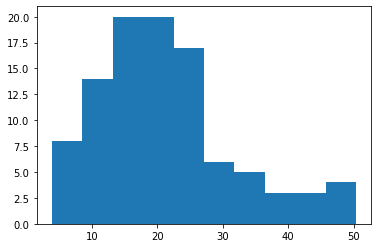

In [8]:
# $CL_i = CL * EXP(ETA_i)$ and $ETA_i \sim Normal(0, \Omega)$
eta_i = dist.Normal(loc=0, scale=0.5).sample(key=random.PRNGKey(123), sample_shape=(100, ))
cl_i = 20 * jnp.exp(eta_i)

plt.hist(cl_i)

(array([ 8., 14., 20., 20., 17.,  6.,  5.,  3.,  3.,  4.]),
 array([ 3.8924613,  8.537684 , 13.182907 , 17.828129 , 22.473352 ,
        27.118574 , 31.763798 , 36.40902  , 41.05424  , 45.699467 ,
        50.34469  ], dtype=float32),
 <BarContainer object of 10 artists>)

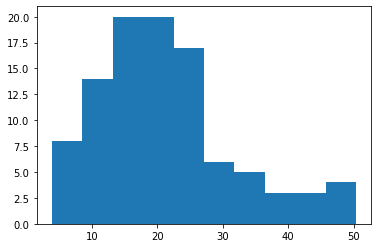

In [9]:
# $log(CL_i) = log(CL) + ETA_i$ and $ETA_i \sim Normal(0, \Omega)$
eta_i = dist.Normal(loc=0, scale=0.5).sample(key=random.PRNGKey(123), sample_shape=(100, ))
log_cl_i = jnp.log(20) + eta_i
cl_i = jnp.exp(log_cl_i)

plt.hist(cl_i)

(array([ 8., 14., 20., 20., 17.,  6.,  5.,  3.,  3.,  4.]),
 array([ 3.8924613,  8.537684 , 13.182907 , 17.828129 , 22.473352 ,
        27.118574 , 31.763798 , 36.40902  , 41.05424  , 45.699467 ,
        50.34469  ], dtype=float32),
 <BarContainer object of 10 artists>)

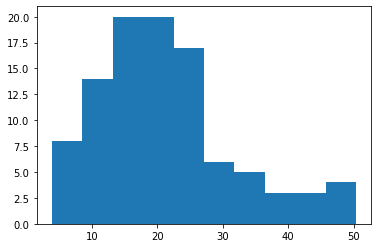

In [10]:
# $log(CL_i) \sim Normal(log(CL), \Omega)$
log_cl_i = dist.Normal(loc=jnp.log(20), scale=0.5).sample(key=random.PRNGKey(123), sample_shape=(100,))
cl_i = jnp.exp(log_cl_i)

plt.hist(cl_i)

(array([ 8., 14., 20., 20., 17.,  6.,  5.,  3.,  3.,  4.]),
 array([ 3.8924613,  8.537684 , 13.182907 , 17.828129 , 22.473352 ,
        27.118574 , 31.763798 , 36.40902  , 41.05424  , 45.699467 ,
        50.34469  ], dtype=float32),
 <BarContainer object of 10 artists>)

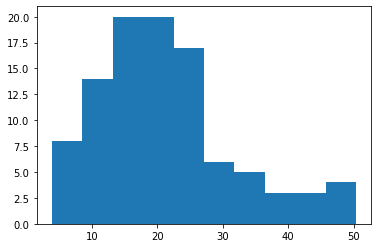

In [18]:
# $CL_i \sim LogNormal(log(CL), \Omega)$
cl_i = dist.LogNormal(loc=jnp.log(20), scale=0.5).sample(key=random.PRNGKey(123), sample_shape=(100,))

plt.hist(cl_i)

### Coefficient of Variance

$$CV = 100 \times \sqrt{exp(\Omega^2)-1}$$

- $\Omega$ - standard deviation

$$CV = 100 \times \sqrt{\Omega^2}$$

In [11]:
omega = 0.5
cv = 100 * jnp.sqrt(jnp.exp(omega**2)-1)
cv

DeviceArray(53.294037, dtype=float32, weak_type=True)

In [12]:
omega = 0.5
cv = 100 * jnp.sqrt(omega**2)
cv

DeviceArray(50., dtype=float32, weak_type=True)